<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/Dimentional_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimentional Reduction

Process of reducing the number of features/dimension


 # Dimensionality Reduction Visualizations


First, we need to import numpy, matplotlib, and scikit-learn and get the UCI ML digit image data. Scikit-learn already comes with this data (or will automatically download it for you) so we don’t have to deal with uncompressing it ourselves! Additionally, I’ve provided a function that will produce a nice visualization of our data.

We are going to use the following libraries and packages:

* **numpy**: "NumPy is the fundamental package for scientific computing with Python." (http://www.numpy.org/)
* **matplotlib**: "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." (https://matplotlib.org/)
* **sklearn**: Scikit-learn is a machien learning library for Python programming language. (https://scikit-learn.org/stable/)
* **umap**: "It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines." (https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 


### Data Set

* load and return digit data set

In [0]:
from sklearn import datasets

# Loading digit images
digits = datasets.load_digits()

X = digits.data
y = digits.target
n_samples, n_features = X.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 1797
number of features: 64


Pixels of images have values between 0 and 16:

In [0]:
np.max(X)
#np.min(X)

16.0

#### Let's visualize some of the images

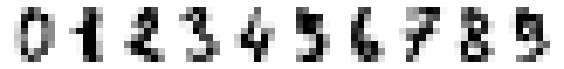

In [0]:
fig, ax_array = plt.subplots(1,10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i])
plt.setp(axes, xticks=[], yticks=[])
plt.tight_layout(h_pad=0.5, w_pad=0.01)

## Principal Component Analysis (PCA)
Principal component analysis creates new orthogonal variables (principle components) that are linear combinations of the original variables. The focus of PCA is to reproduce the total variance in the original higher dimensional space in the lower dimensional space.
PCA is an optimum approach for mapping to the lower dimensional space and be able to reconstruct the original space afterward.

1) The first principal component (PC) corresponds to a line that passes through the mean. The lines is the regression line so that it minimizes the sum of squares of the distances of the points from the line. 

2) The second PC corresponds to the same concept after all correlation with the first principal component has been subtracted from the points.


## Synthetic data 
Let's generate synthetic data as follows:
1) Points are scattered in 2 dimensional space as follows. There are N-2 other dimensions that all the points have same values in each dimension
2) We will reduce the dimensionality of the data to 2D

Text(0, 0.5, '2nd dimension')

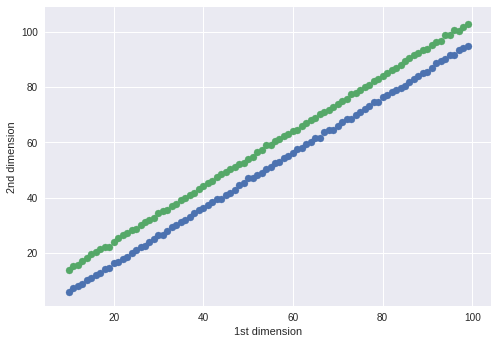

In [0]:
group_1 = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)-np.repeat(4,90)
group_2 = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)+np.repeat(4,90)
plt.scatter(np.arange(10,100),group_1)
plt.scatter(np.arange(10,100),group_2)
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

(180, 2)


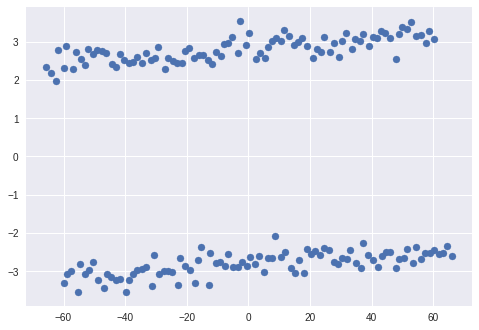

In [0]:
from sklearn import decomposition
####
combined = np.column_stack((np.concatenate([np.arange(10,100),np.arange(10,100)]),np.concatenate([group_1,group_2])))
print(combined.shape)
####
combined_pca = decomposition.PCA(n_components=2).fit_transform(combined)

plt.scatter(combined_pca[:,0], combined_pca[:,1])

Now that we understood how PCa works, let's implement it on the UCI ML digit image data:

In [0]:
from sklearn import decomposition

X_pca = decomposition.PCA(n_components=2).fit_transform(X)
X_pca.shape

(1797, 2)

Let's write a function to use it for visualization of the results of all the dimension reduction methods.

In [0]:
def embedding_plot(X,labels,title):
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.grid(False)
  plt.title(title, fontsize=24);

Now, we use the plotting function to show the first 2 principle component scores of all teh data points.

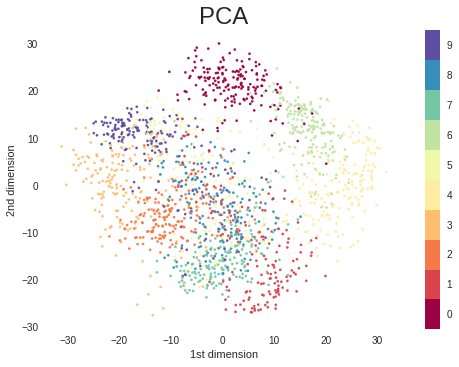

In [0]:
embedding_plot(X_pca, y,"PCA")

**PCA is an unsupervised approach. We add color for the sample labels afterward.**

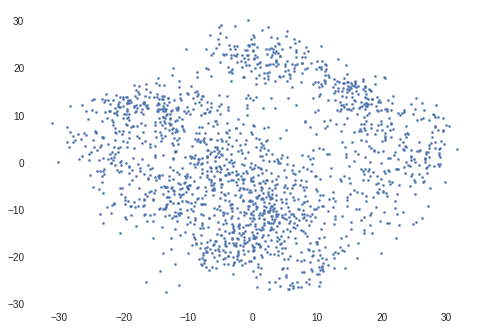

In [0]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=5)
plt.gca().set_facecolor((1, 1, 1))

The variance explained by PCs decreases in order. In other word, the first PC explaines the most varaince and then the 2nd one and so on. The total variance explained by the PCs is supposed to be equal to the total varaince of the data.

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415]


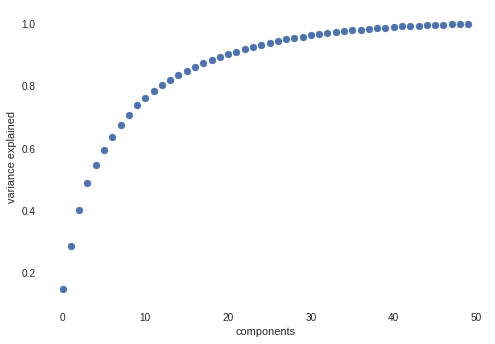

In [0]:
component_num = 50
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(X)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca.explained_variance_ratio_[0:5])

# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is an algorithm to optimally map the higher dimensional space to lower dimensions paying attention to short distances. The trasformation is different for different regions. SNE is the general concept behind this type of mapping and "t" shows usage of t-distribution in t-SNE. 
There are some important points regarding parameter setting and interpretation of t-SNE output:

Let's try using t-SNE on the synthetic data we generated before:

---



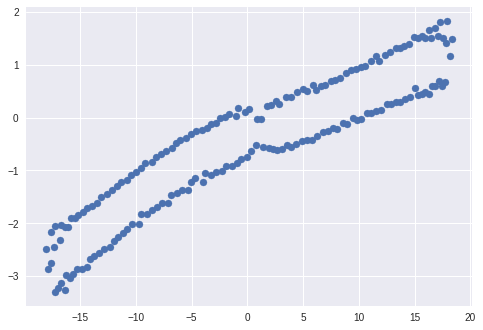

In [0]:
from sklearn import manifold

combined_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500, random_state=2).fit_transform(combined)

plt.scatter(combined_tsne[:,0], combined_tsne[:,1])

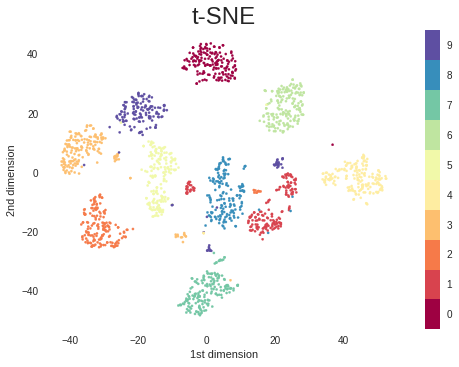

In [0]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(X)
embedding_plot(X_tsne, y,"t-SNE")


**Parameters:**

* ***Perplexity (perplexity)***: somehow shows the number of close neighbors each point has. Hence, perplexity should be smaller than the number of points. There is a suggested range for perplexity in the original paper: "The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.". Although perplexity=5 is usually not optimal, values higher than 50 also may result in weird grouping of the data points and shapes in 2 dimensional space. 

* ***Number of iterations (n_iter)*** required for converagence of the approach is another important parameter that depened on the input dataset. There are no fixed number to make sure of the convergence but there are some rule of thumb to check that. As an example, if there are pinched shapes in the t-SNE plot, it is better to run the approach for higher iteration number to makes sure that the resulted shapes and clusters are not artifacts of an unconverged t-SNE.

Let's try other parameter values:

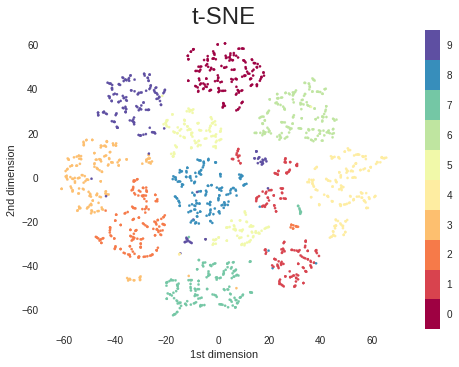

In [0]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=5,learning_rate=200,n_iter=500,random_state=2).fit_transform(X)
embedding_plot(X_tsne, y,"t-SNE")

**Interpretation:**

* **Sizes of clusters in t-SNE do not have any meaning**: t-SNE contracts the sparse clusters while expands dense ones to even out the cluster sizes in the final layouts. 

* **Distances between the separated clusters do not have any meaning**: t-SNE tries to keep the data points, that are in proxity of each other in high dimensional space, close to each other in low dimensional space while not takeing care of the greater distances, distance between clusters, in the mapping.

* **We may get clusters from random data**: Different perplexity or iteration number may even resuls in clusters for random data. So when you see clusters in your 2D t-SNE output, it does not mean the input data are not randomly distributed.

# Uniform Manifold Approximation and Projection (UMAP)

UMAP is a manifold learning method that is comptetitive to t-SNE for visualization quality while preserving the global structure of data, unlike t-SNE. UMAP has no computational restriction and is scalable to extremely large dataset, like GoogleNews, unlike t-SNE.

UMAP uses k-nearest neighbor and uses Stochastic Gradient Descent to minimize the difference between the distances in the high dimensional and low dimensional spaces.


**Definitions**

* A n-dimensional manifold (n-manifold) M is a topological space that is locally homeomorphic to the Euclidean space of dimension n.
* Locally homeomorphic means that every point in the space M is contained in an open set U such that there is a one-to-one onto map f:U -> M.
* One-to-one onto map f:U -> M means that each element of M is mapped by exactly one element of U.
* A topological space is a collection of open sets (with some mathematical properties).
* A Riemannian (smooth) manifold M is a real smooth manifold with an inner product that varies smoothly from point to point in the tangent space of M.
* Riemannian metric is collection of all the inner products of the points in the manifold M on the tangent space of M.

* A simplicial complex K in n-dimensional real space is a collection of simplices in the space such that 1) Every face of a simplex of K is in K, and 2) The intersection of any two simplices of K is a face of each of them (Munkres 1993, p. 7; http://mathworld.wolfram.com/).
* A simplex is the generalization of a tetrahedral region of space to n dimensions(http://mathworld.wolfram.com/).

Let's try using t-SNE on the synthetic data we generated before:

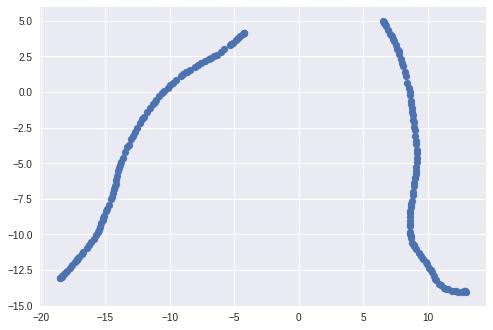

In [0]:
import umap

combined_umap = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2,random_state=2).fit_transform(combined)
plt.scatter(combined_umap[:,0], combined_umap[:,1])

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


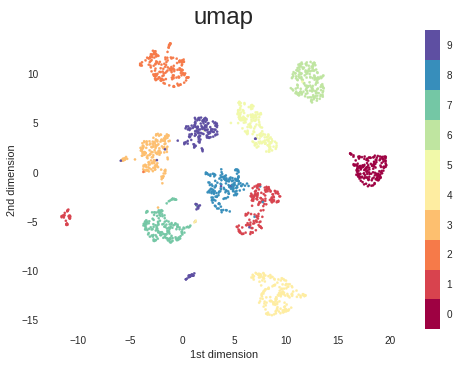

In [0]:
import umap

X_umap = umap.UMAP(n_neighbors=5, min_dist=0.4, n_components=2, random_state=2).fit_transform(X)
embedding_plot(X_umap, y,"umap")

***Parameters:
* **Number of neighbors (n_neighbors)**:  Number of neighboring data points used in the process of local manifold approximation. This parameters is suggested to be between 5 and 50.
* **Minimum distance (min_dist)**: It is a measure of allowed compression of points together in low dimensional space. This parameters is suggested to be between 0.001 and 0.5.

Let's try other parameter values:

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


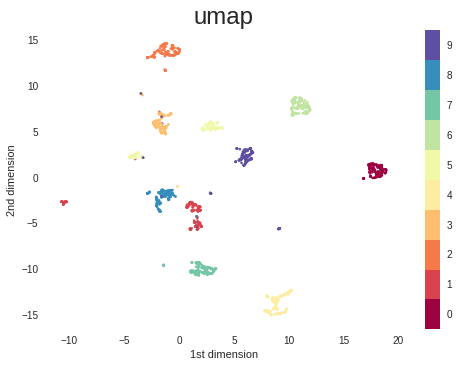

In [0]:
import umap

X_umap = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2,random_state=2).fit_transform(X)
embedding_plot(X_umap, y,"umap")